In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
data = pd.read_csv('..\ESS_survey.csv')
data.head()

C:\Users\lleki\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (164) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,name,essround,edition,proddate,idno,cntry,nwspol,netusoft,netustm,ppltrst,...,inwsmm,inwdde,inwmme,inwyye,inwehh,inwemm,inwtm,dweight,pspwght,pweight
0,ESS8e02_1,8,2.1,01.12.2018,1,AT,120,4,180,8,...,37,5,12,2016,8,33,50.0,0.611677,1.178496,0.370393
1,ESS8e02_1,8,2.1,01.12.2018,2,AT,120,5,120,6,...,39,25,11,2016,11,10,86.0,1.223354,0.899472,0.370393
2,ESS8e02_1,8,2.1,01.12.2018,4,AT,30,2,6666,5,...,17,22,11,2016,18,0,38.0,0.389058,0.315753,0.370393
3,ESS8e02_1,8,2.1,01.12.2018,6,AT,30,5,120,6,...,9,11,10,2016,19,59,46.0,0.642594,0.472467,0.370393
4,ESS8e02_1,8,2.1,01.12.2018,10,AT,30,5,180,5,...,31,1,12,2016,11,49,70.0,3.432402,2.246706,0.370393


In [3]:
data.shape

(44387, 534)

In [4]:
variables = pd.read_csv('..\Variables.csv')

In [5]:
variables.head()

,Name,Label,Country_specific,Scale_type,Type,Format,Valid,Invalid,Question,Group
0,cntry,Country,no,nominal,discrete,character-2,44387,0,5 Country,Group Country
1,dweight,Design weight,no,continuous,continuous,numeric-4.2,44387,0,R17 Design weight,Group Weights
2,pspwght,Post-stratification weight including design we...,no,continuous,continuous,numeric-4.2,44387,0,R18 Post-stratification weight including desig...,Group Weights
3,pweight,Population size weight (must be combined with ...,no,continuous,continuous,numeric-8.2,44387,0,R19 Population size weight (must be combined w...,Group Weights
4,nwspol,"News about politics and current affairs, watch...",no,continuous,continuous,numeric-4.0,43863,524,"A1 On a typical day, about how much time do yo...",Group Media and social trust


In [6]:
variables.groupby(['Group']).sum()

,Valid,Invalid
Group,,
Group Administrative variables,708070,2122
Group Climate change,1320590,99794
Group Country,44387,0
"Group Gender, Year of birth and Household grid",390214,1252105
Group Human values,914265,17862
Group Media and social trust,250869,15453
Group Politics,1843009,2196208
Group Socio-demographics,3508301,5812969
"Group Subjective well-being, social exclusion, religion, national and ethnic identity",1767160,1561865


In [7]:
variables.Group.value_counts()

Group Socio-demographics                                                                 210
Group Politics                                                                            91
Group Subjective well-being, social exclusion, religion, national and ethnic identity     75
Group Welfare attitudes                                                                   42
Group Gender, Year of birth and Household grid                                            37
Group Climate change                                                                      32
Group Human values                                                                        21
Group Administrative variables                                                            16
Group Media and social trust                                                               6
Group Weights                                                                              3
Group Country                                                         

In [8]:
data.drop_duplicates(inplace = True)
data.shape

(44387, 534)

In [9]:
variables_a_garder = variables[(variables['Group'] == "Group Human values")|(variables['Group'] == "Group Country")]['Name']
variables_a_garder = list(variables_a_garder) + ['edulvlb', 'domicil','agea','gndr','hhmmb']

In [10]:
data_keep = data[variables_a_garder]

In [11]:
cols_suppr = data_keep.columns[data_keep.isna().sum()/len(data_keep) > 0]
cols_suppr

Index([], dtype='object')

In [12]:
data_keep.isna().sum()

cntry      0
ipcrtiv    0
imprich    0
ipeqopt    0
ipshabt    0
impsafe    0
impdiff    0
ipfrule    0
ipudrst    0
ipmodst    0
ipgdtim    0
impfree    0
iphlppl    0
ipsuces    0
ipstrgv    0
ipadvnt    0
ipbhprp    0
iprspot    0
iplylfr    0
impenv     0
imptrad    0
impfun     0
edulvlb    0
domicil    0
agea       0
gndr       0
hhmmb      0
dtype: int64

In [13]:
from collections import Counter
for x in data_keep:
    print(x)
    print(Counter(data_keep[x]).most_common())

cntry
[('DE', 2852), ('IE', 2757), ('IT', 2626), ('IL', 2557), ('RU', 2430), ('CZ', 2269), ('LT', 2122), ('FR', 2070), ('EE', 2019), ('AT', 2010), ('GB', 1959), ('ES', 1958), ('FI', 1925), ('BE', 1766), ('PL', 1694), ('NL', 1681), ('HU', 1614), ('SE', 1551), ('NO', 1545), ('CH', 1525), ('SI', 1307), ('PT', 1270), ('IS', 880)]
ipcrtiv
[(2, 14124), (3, 10868), (1, 9057), (4, 5390), (5, 3221), (6, 880), (8, 422), (7, 236), (9, 189)]
imprich
[(5, 14465), (4, 9327), (3, 7719), (6, 5916), (2, 4558), (1, 1609), (8, 352), (7, 257), (9, 184)]
ipeqopt
[(2, 17282), (1, 12731), (3, 8474), (4, 3350), (5, 1414), (8, 396), (6, 316), (7, 231), (9, 193)]
ipshabt
[(2, 10754), (3, 10405), (5, 7944), (4, 7673), (1, 4613), (6, 2102), (8, 461), (7, 243), (9, 192)]
impsafe
[(2, 15608), (1, 11810), (3, 8437), (4, 4476), (5, 2781), (6, 529), (8, 337), (7, 218), (9, 191)]
impdiff
[(2, 11701), (3, 10613), (4, 7713), (5, 6067), (1, 6024), (6, 1444), (8, 397), (7, 238), (9, 190)]
ipfrule
[(2, 11414), (3, 10268), (

### base prédiction

In [14]:
data_ss_pays = data_keep.drop(["cntry","edulvlb","domicil","agea","gndr","hhmmb"], inplace = False, axis = 1)

In [15]:
data_ss_pays.head()

,ipcrtiv,imprich,ipeqopt,ipshabt,impsafe,impdiff,ipfrule,ipudrst,ipmodst,ipgdtim,...,iphlppl,ipsuces,ipstrgv,ipadvnt,ipbhprp,iprspot,iplylfr,impenv,imptrad,impfun
0,2,6,1,2,2,3,5,1,2,4,...,1,2,6,3,6,1,1,1,6,3
1,3,6,2,3,5,3,5,3,4,3,...,3,3,4,5,5,2,2,2,5,5
2,3,5,2,4,1,6,5,2,3,2,...,3,6,1,6,3,3,1,2,2,3
3,2,3,2,2,2,3,3,2,2,2,...,3,3,2,3,4,2,2,3,2,2
4,3,4,1,4,3,3,5,3,1,1,...,1,3,4,5,2,3,1,1,4,1


In [16]:
data_ss_pays.describe()

,ipcrtiv,imprich,ipeqopt,ipshabt,impsafe,impdiff,ipfrule,ipudrst,ipmodst,ipgdtim,...,iphlppl,ipsuces,ipstrgv,ipadvnt,ipbhprp,iprspot,iplylfr,impenv,imptrad,impfun
count,44387.00000,44387.000000,44387.000000,44387.000000,44387.000000,44387.000000,44387.000000,44387.000000,44387.000000,44387.000000,...,44387.000000,44387.000000,44387.000000,44387.000000,44387.000000,44387.000000,44387.000000,44387.000000,44387.000000,44387.000000
mean,2.69410,4.174240,2.289071,3.322527,2.461554,3.101539,3.340505,2.495213,2.748575,3.008291,...,2.305788,3.285061,2.467930,3.927862,2.811296,3.279992,2.068038,2.273909,2.849010,3.091694
std,1.45156,1.422049,1.327045,1.540109,1.417055,1.507647,1.557238,1.325056,1.417715,1.484877,...,1.264741,1.522774,1.449126,1.541310,1.435272,1.531612,1.231382,1.284093,1.511503,1.485149
min,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.00000,3.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000
50%,2.00000,4.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,3.000000,...,2.000000,3.000000,2.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000
75%,3.00000,5.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,4.000000,4.000000
max,9.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [17]:
data_ss_pays.dtypes

ipcrtiv    int64
imprich    int64
ipeqopt    int64
ipshabt    int64
impsafe    int64
impdiff    int64
ipfrule    int64
ipudrst    int64
ipmodst    int64
ipgdtim    int64
impfree    int64
iphlppl    int64
ipsuces    int64
ipstrgv    int64
ipadvnt    int64
ipbhprp    int64
iprspot    int64
iplylfr    int64
impenv     int64
imptrad    int64
impfun     int64
dtype: object

### stats

In [18]:
data_ss_pays.hist(figsize=(12,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B99B01CA90>,
      dtype=object)

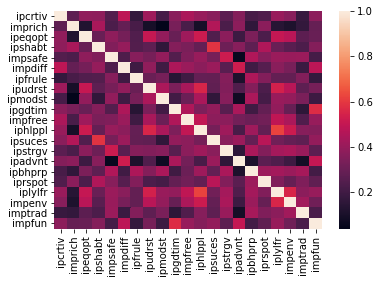

In [19]:
import seaborn as sns
sns.heatmap(data_ss_pays.corr())

In [20]:
for col in data_ss_pays:
    print("colonne "+col+" :'Je ne sais pas' = "+ str(round(len(data[(data_ss_pays[col] == 9)])/len(data_ss_pays)*100,2))+"%"
     +" ; 'Je ne veux pas répondre' = "+ str(round(len(data[(data_ss_pays[col] == 8)])/len(data_ss_pays)*100,2))+"%. Total :"
     +str(round(len(data[(data_ss_pays[col] == 9)|(data_ss_pays[col] == 8)])/len(data_ss_pays)*100,2)))

colonne ipcrtiv :'Je ne sais pas' = 0.43% ; 'Je ne veux pas répondre' = 0.95%. Total :1.38
colonne imprich :'Je ne sais pas' = 0.41% ; 'Je ne veux pas répondre' = 0.79%. Total :1.21
colonne ipeqopt :'Je ne sais pas' = 0.43% ; 'Je ne veux pas répondre' = 0.89%. Total :1.33
colonne ipshabt :'Je ne sais pas' = 0.43% ; 'Je ne veux pas répondre' = 1.04%. Total :1.47
colonne impsafe :'Je ne sais pas' = 0.43% ; 'Je ne veux pas répondre' = 0.76%. Total :1.19
colonne impdiff :'Je ne sais pas' = 0.43% ; 'Je ne veux pas répondre' = 0.89%. Total :1.32
colonne ipfrule :'Je ne sais pas' = 0.45% ; 'Je ne veux pas répondre' = 1.22%. Total :1.67
colonne ipudrst :'Je ne sais pas' = 0.44% ; 'Je ne veux pas répondre' = 0.99%. Total :1.43
colonne ipmodst :'Je ne sais pas' = 0.45% ; 'Je ne veux pas répondre' = 0.94%. Total :1.38
colonne ipgdtim :'Je ne sais pas' = 0.44% ; 'Je ne veux pas répondre' = 0.86%. Total :1.3
colonne impfree :'Je ne sais pas' = 0.44% ; 'Je ne veux pas répondre' = 0.8%. Total :1.24
c

# Modélisation

## DBScan

In [22]:
from sklearn.cluster import DBSCAN

data_ss_pays['labels_DBSCAN'] = DBSCAN(eps=1).fit_predict(data_ss_pays)

In [23]:
Counter(data_ss_pays.labels_DBSCAN).most_common()

[(-1, 43414),
 (0, 181),
 (9, 181),
 (2, 161),
 (4, 153),
 (3, 117),
 (1, 87),
 (5, 44),
 (6, 15),
 (11, 6),
 (7, 6),
 (8, 6),
 (10, 6),
 (13, 5),
 (12, 5)]

## K Means

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = range(2,21)

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_ss_pays)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_ss_pays, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_ss_pays, cluster_labels)

For n_clusters = 2 The average silhouette_score is : 0.6454192692844869
For n_clusters = 3 The average silhouette_score is : 0.1383277255804196
For n_clusters = 4 The average silhouette_score is : 0.1159162125800784
For n_clusters = 5 The average silhouette_score is : 0.1069966809340713
For n_clusters = 6 The average silhouette_score is : 0.09095611242860943
For n_clusters = 7 The average silhouette_score is : 0.07917424579105443
For n_clusters = 8 The average silhouette_score is : 0.07652538959169829
For n_clusters = 9 The average silhouette_score is : 0.07631180810039778
For n_clusters = 10 The average silhouette_score is : 0.07609437727164871
For n_clusters = 11 The average silhouette_score is : 0.06619106364328481
For n_clusters = 12 The average silhouette_score is : 0.06544990343080855
For n_clusters = 13 The average silhouette_score is : 0.05855183766403528
For n_clusters = 14 The average silhouette_score is : 0.058307232815481336
For n_clusters = 15 The average silhouette_score 

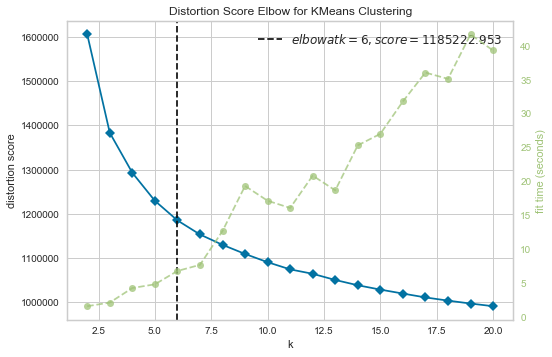

In [25]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,21))
visualizer.fit(data_ss_pays)
visualizer.poof()

## Modélisation selon modèle choisi

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
KMlabels = kmeans.fit_predict(data_ss_pays)

In [24]:
Counter(pd.Series(KMlabels)).most_common()

[(0, 10617), (1, 10415), (4, 9243), (5, 7708), (2, 5758), (3, 646)]

In [25]:
KMLabels = pd.DataFrame(KMlabels, columns = ["Label_KM"])
KMLabels.head()

,Label_KM
0,5
1,2
2,1
3,4
4,5


# Constitution de la base d'analyse des résultats

In [26]:
data_eval = data_keep.merge(KMLabels, left_on=data_keep.index, right_on= KMLabels.index, how = "left")
data_eval.head()

,key_0,cntry,ipcrtiv,imprich,ipeqopt,ipshabt,impsafe,impdiff,ipfrule,ipudrst,...,iplylfr,impenv,imptrad,impfun,edulvlb,domicil,agea,gndr,hhmmb,Label_KM
0,0,AT,2,6,1,2,2,3,5,1,...,1,1,6,3,720,1,34,2,1,5
1,1,AT,3,6,2,3,5,3,5,3,...,2,2,5,5,313,1,52,1,2,2
2,2,AT,3,5,2,4,1,6,5,2,...,1,2,2,3,322,4,68,2,1,1
3,3,AT,2,3,2,2,2,3,3,2,...,2,3,2,2,322,1,54,1,1,4
4,4,AT,3,4,1,4,3,3,5,3,...,1,1,4,1,322,3,20,2,5,5


In [27]:
data_eval.drop('key_0', axis = 1, inplace = True)

In [28]:
data_eval.drop(data_eval[data_eval.agea == 999].index, inplace = True, axis = 0)
data_eval.drop(data_eval[(data_eval.edulvlb == 5555)|(data_eval.edulvlb == 7777)|(data_eval.edulvlb == 8888)|(data_eval.edulvlb == 9999)].index, inplace = True, axis = 0)
data_eval.drop(data_eval[data_eval.gndr == 9].index, inplace = True, axis = 0)
data_eval.drop(data_eval[(data_eval.domicil == 7)|(data_eval.domicil == 8)|(data_eval.domicil == 9)].index, inplace = True, axis = 0)
data_eval.drop(data_eval[(data_eval.hhmmb == 99)|(data_eval.hhmmb == 77)|(data_eval.hhmmb == 88)].index, inplace = True, axis = 0)
data_eval.shape

(43907, 28)

In [29]:
data_eval.head()

,cntry,ipcrtiv,imprich,ipeqopt,ipshabt,impsafe,impdiff,ipfrule,ipudrst,ipmodst,...,iplylfr,impenv,imptrad,impfun,edulvlb,domicil,agea,gndr,hhmmb,Label_KM
0,AT,2,6,1,2,2,3,5,1,2,...,1,1,6,3,720,1,34,2,1,5
1,AT,3,6,2,3,5,3,5,3,4,...,2,2,5,5,313,1,52,1,2,2
2,AT,3,5,2,4,1,6,5,2,3,...,1,2,2,3,322,4,68,2,1,1
3,AT,2,3,2,2,2,3,3,2,2,...,2,3,2,2,322,1,54,1,1,4
4,AT,3,4,1,4,3,3,5,3,1,...,1,1,4,1,322,3,20,2,5,5


### Tranches d'âges

In [30]:
bins = [0, 35, 50, 65, 100]
labels = ["-35","35-50","50-65","+65"]
data_eval['tranches_age'] = pd.cut(data_eval.agea, bins=bins, labels=labels)
Counter(data_eval.tranches_age).most_common()

[('-35', 12023), ('50-65', 11367), ('35-50', 10770), ('+65', 9747)]

### Tranches niveau de formation

In [31]:
bins = [-1, 100, 200, 300, 400, 500, 600, 700, 800]
labels = ["sans formation","ISCED 1","ISCED 2","ISCED 3","ISCED 4","ISCED 5-1","ISCED 5-2","ISCED 6"]
data_eval['formation'] = pd.cut(data_eval.edulvlb, bins=bins, labels=labels)
labels_num = [1,2,3,4,5,6,7,8]
data_eval['formation_num'] = pd.cut(data_eval.edulvlb, bins=bins, labels=labels_num)
Counter(data_eval.formation).most_common()

[('ISCED 3', 15789),
 ('ISCED 2', 7327),
 ('ISCED 6', 5974),
 ('ISCED 5-2', 4737),
 ('ISCED 5-1', 3571),
 ('ISCED 1', 3334),
 ('ISCED 4', 2680),
 ('sans formation', 495)]

### zone géographique

In [32]:
continents = pd.read_csv('..\countryContinent.csv', encoding='cp1252')

In [33]:
continents.head()

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


In [34]:
df_region = continents[['code_2','sub_region']]
df_region.head()

,code_2,sub_region
0,AF,Southern Asia
1,AX,Northern Europe
2,AL,Southern Europe
3,DZ,Northern Africa
4,AS,Polynesia


In [35]:
data_eval = data_eval.merge(df_region, left_on=data_eval.cntry, right_on= 'code_2', how = "left")

In [36]:
data_eval.isna().sum().sum()

0

In [37]:
data_eval.sub_region.value_counts()

Northern Europe    14534
Western Europe     11823
Eastern Europe      7983
Southern Europe     7045
Western Asia        2522
Name: sub_region, dtype: int64

In [38]:
#datacomplete.drop(datacomplete[datacomplete.sub_region == "Western Asia"].index, inplace = True, axis = 0)

In [39]:
data_eval.drop(["code_2"], inplace = True, axis = 1)

### Remplacement codes par leur signification

In [40]:
data_eval["Sexe"] = data_eval.gndr.replace(1,"Homme").replace(2,"Femme")
data_eval["habitat"] = data_eval.domicil.replace(1,"grande ville").replace(2,"banlieue").replace(3,"petite ville").replace(4,"village").replace(5,"campagne")

In [41]:
data_eval.habitat.value_counts(normalize = True)

petite ville    0.314437
village         0.299747
grande ville    0.224292
banlieue        0.100030
campagne        0.061494
Name: habitat, dtype: float64

In [42]:
data_eval.head()

,cntry,ipcrtiv,imprich,ipeqopt,ipshabt,impsafe,impdiff,ipfrule,ipudrst,ipmodst,...,agea,gndr,hhmmb,Label_KM,tranches_age,formation,formation_num,sub_region,Sexe,habitat
0,AT,2,6,1,2,2,3,5,1,2,...,34,2,1,5,-35,ISCED 6,8,Western Europe,Femme,grande ville
1,AT,3,6,2,3,5,3,5,3,4,...,52,1,2,2,50-65,ISCED 3,4,Western Europe,Homme,grande ville
2,AT,3,5,2,4,1,6,5,2,3,...,68,2,1,1,+65,ISCED 3,4,Western Europe,Femme,village
3,AT,2,3,2,2,2,3,3,2,2,...,54,1,1,4,50-65,ISCED 3,4,Western Europe,Homme,grande ville
4,AT,3,4,1,4,3,3,5,3,1,...,20,2,5,5,-35,ISCED 3,4,Western Europe,Femme,petite ville


In [43]:
data_eval.to_csv("Resultatclustering2.csv", sep = ";", index = False, encoding = "utf-8")

In [169]:
from matplotlib import pyplot as plt

for cluster in data_eval["Label_KM"].unique():
    subset = data_eval[data_eval["Label_KM"]==cluster]
    n = str(subset.shape[0])
    #subset['agea'].hist()
    #plt.title(str(cluster) + "-" + n)
    #plt.show()
    #
    #print("region")
    #print(subset.sub_region.value_counts(normalize = True))
    #print("formation")
    #print(subset.formation.value_counts(normalize = True))
    print("habitat")
    print(subset.habitat.value_counts(normalize = True))

habitat
petite ville    0.328157
village         0.294831
grande ville    0.188223
banlieue        0.111543
campagne        0.077247
Name: habitat, dtype: float64
habitat
petite ville    0.323666
village         0.300077
grande ville    0.179814
banlieue        0.115623
campagne        0.080626
9               0.000193
Name: habitat, dtype: float64
habitat
petite ville    0.315319
village         0.306827
grande ville    0.247491
banlieue        0.084703
campagne        0.045660
Name: habitat, dtype: float64
habitat
petite ville    0.310841
village         0.302729
grande ville    0.226524
banlieue        0.099312
campagne        0.060595
Name: habitat, dtype: float64
habitat
village         0.300527
petite ville    0.290228
grande ville    0.270919
banlieue        0.092101
campagne        0.046109
9               0.000117
Name: habitat, dtype: float64
habitat
petite ville    0.330671
grande ville    0.301917
village         0.241214
banlieue        0.083067
campagne        0.043131
Na

In [149]:
data_eval.head()

,cntry,edulvlb,domicil,agea,gndr,hhmmb,sub_region,Label_KM,tranches_age,Sexe,habitat
0,AT,720,1,34,2,1,Western Europe,0,-35,Femme,grande ville
1,AT,313,1,52,1,2,Western Europe,5,50-65,Homme,grande ville
2,AT,322,4,68,2,1,Western Europe,0,+65,Femme,village
3,AT,322,1,54,1,1,Western Europe,3,50-65,Homme,grande ville
4,AT,322,3,20,2,5,Western Europe,1,-35,Femme,petite ville


## Gaussian Mixture

In [112]:
from sklearn.mixture import GaussianMixture
BGM = GaussianMixture(n_components=5)
BGM_labels = BGM.fit_predict(data_ss_pays)

Counter(BGM_labels).most_common()
from sklearn.metrics import silhouette_score
silhouette_score(data_ss_pays, BGM_labels)
print(silhouette_score(data_ss_pays, BGM_labels))



-0.015311826336529907


# Etude des résultats

In [69]:
variables[variables['Group'] == "Group Gender, Year of birth and Household grid"]

,Name,Label,Country_specific,Scale_type,Type,Format,Valid,Invalid,Question,Group
250,hhmmb,Number of people living regularly as member of...,no,ordinal,continuous,numeric-2.0,44263,124,"F1 Including yourself, how many people\n- incl...","Group Gender, Year of birth and Household grid"
251,gndr,Gender,no,nominal,discrete,numeric-1.0,44378,9,"F21 CODE SEX, respondent","Group Gender, Year of birth and Household grid"
252,gndr2,Gender of second person in household,no,nominal,discrete,numeric-1.0,34729,9658,F22 CODE SEX (2. person in household),"Group Gender, Year of birth and Household grid"
253,gndr3,Gender of third person in household,no,nominal,discrete,numeric-1.0,19332,25055,F23 CODE SEX (3. person in household),"Group Gender, Year of birth and Household grid"
254,gndr4,Gender of fourth person in household,no,nominal,discrete,numeric-1.0,11217,33170,F24 CODE SEX (4. person in household),"Group Gender, Year of birth and Household grid"
255,gndr5,Gender of fifth person in household,no,nominal,discrete,numeric-1.0,4028,40359,F25 CODE SEX (5. person in household),"Group Gender, Year of birth and Household grid"
256,gndr6,Gender of sixth person in household,no,nominal,discrete,numeric-1.0,1358,43029,F26 CODE SEX (6. person in household),"Group Gender, Year of birth and Household grid"
257,gndr7,Gender of seventh person in household,no,nominal,discrete,numeric-1.0,466,43921,F27 CODE SEX (7. person in household),"Group Gender, Year of birth and Household grid"
258,gndr8,Gender of eighth person in household,no,nominal,discrete,numeric-1.0,165,44222,F28 CODE SEX (8. person in household),"Group Gender, Year of birth and Household grid"
259,gndr9,Gender of ninth person in household,no,nominal,discrete,numeric-1.0,68,44319,F29 CODE SEX (9. person in household),"Group Gender, Year of birth and Household grid"


In [145]:
variables[variables.Name == 'domicil']

,Name,Label,Country_specific,Scale_type,Type,Format,Valid,Invalid,Question,Group
301,domicil,"Domicile, respondent's description",no,ordinal,discrete,numeric-1.0,44337,50,F14 Which phrase on this card best describes t...,Group Socio-demographics


J'ai utilisé Tableau pour visualiser les résultats de cette modélisation.